# Installed Python libraries

In [ ]:
! pip install pubchempy
! pip install rdkit
! pip install pandas
! pip install scikit-learn
! pip install xgboost
! brew install llvm
! brew install libomp

# All imports

In [8]:
import pubchempy as pcp
import pickle
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors
import numpy as np
import pandas as pd

# Functions

In [24]:
import pubchempy as pcp
import pickle
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors

# Get compound information from pubchem website for one compound name. 
def getCompounds(names):
    data = {}
    for chemical_name in names:
        compounds = pcp.get_compounds(chemical_name, 'name')
        data[chemical_name] = compounds
    return data


# The following functions get features from PubChem and RDKit. 
# getFeatures wrap all of them together


def getFeaturesFromPubChem(compound):
    x_dict = compound.to_dict()
    count_keys = ['atom_stereo_count', 'bond_stereo_count', 'charge', 'complexity', 'covalent_unit_count', 'defined_atom_stereo_count', 'defined_bond_stereo_count', 
              'exact_mass', 'h_bond_acceptor_count', 'h_bond_donor_count', 
              'heavy_atom_count', 
              'isotope_atom_count', 
              'molecular_weight', 'monoisotopic_mass', 
              'rotatable_bond_count', 'tpsa', 'undefined_atom_stereo_count', 'undefined_bond_stereo_count', 
              'volume_3d', 'xlogp']
    subset_dict = {key: x_dict[key] for key in count_keys}
    #print(subset_dict["exact_mass"])

    return subset_dict

def getRdkitMoleculeFromPubChemCompound(compound):
    return Chem.MolFromInchi(compound.inchi) 

def getFeaturesFromChem(molelcule, descriptor_names=DESCRIPTOR_NAMES):
    calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
    descriptors = calculator.CalcDescriptors(molelcule)

    descriptor_dict = dict(zip(DESCRIPTOR_NAMES, descriptors))

    return descriptor_dict

def getFeaturesFromRdkit(compound, descriptor_names=DESCRIPTOR_NAMES):
    molecule = getRdkitMoleculeFromPubChemCompound(compound)
    
    calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
    descriptors = calculator.CalcDescriptors(molecule)

    descriptor_dict = dict(zip(descriptor_names, descriptors))
    return descriptor_dict

def getFeatures(compound):
    dict_1 = getFeaturesFromPubChem(compound);
    dict_2 = getFeaturesFromRdkit(compound, DESCRIPTOR_NAMES)
    return dict_1 | dict_2


# Some data took time to generate. So the following two functions 
# are used to save/load them so that we do not have to regenerate them.

def save_object_to_disk(data, file_path):

    # Open the file in binary write mode and dump the object
    with open(file_path, 'wb') as file:
        pickle.dump(data, file)

        print("Object data has been serialized and saved to file.")

def load_object_from_disk(file_path):
    # Open the file in binary read mode and load the object
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
        print("Object has been deserialized and loaded from file.")
        return data    


# L flos Data
Compounds in L flos are mostly collected from https://www.sciencedirect.com/science/article/pii/S2589377719300229#tbl3, which compiled more than 200 compounds


In [59]:
# Compounds in lonicerae.
lonicerae_filenames = [
    "lonicerae_tab1e1.tsv",
    "lonicerae_tab1e2.tsv",
    "lonicerae_tab1e3.tsv",
    "lonicerae_tab1e4.tsv",
    "lonicerae_tab1e5.tsv"
]

lf_compound_names = []

for file_path in lonicerae_filenames:
    df = pd.read_csv(file_path, sep='\t')
    column_name = df.columns[0]  
    lf_compound_names.extend(df[column_name].tolist())
    
lonicerae_paper2_filename = 'lonicerae_clean.txt'
with open(lonicerae_paper2_filename, 'r') as file:
    lines = file.readlines()

lf_compound_names.extend(lines)

# Strip newline characters from each line. Also remove empty lines. Also change′ to '
lf_compound_names = [name.strip().replace('′','\'') for name in lf_compound_names if name.strip()]
lf_compound_names = [name.replace('β','beta') for name in lf_compound_names]
lf_compound_names = [name.replace('α','alpha') for name in lf_compound_names]

print(len(lf_compound_names))
lf_compound_names = list(set(lf_compound_names))
print(len(lf_compound_names))

lf_compound_names

320
310


['Hexahydrofarnesyl acetone',
 'Trans-ferulic acid',
 '1-decanol',
 'Dehydromorroniside',
 'Ribenol',
 'Deoxyoprolinoyiloganin A',
 'Octadecane',
 '3-buten-2-one',
 'L-Phenylalaninosecologanin C',
 '(E)-2-octanal',
 '2-undecyl-methyl cyclopropane pentanoic acid',
 'Benzyl benzoate',
 '3,7,11,15-tetramethyl-2-hexadecan-1-ol',
 '6,7-dioxabicyclo[3.2.2] non-8-ene',
 '7-Epiloganin',
 'Methyl myristate',
 'Ethyl laurate',
 '6,10,14-trimethyl-pentadecan-2-ol',
 "5-Hydroxy-7,3',4',5'-tetramethoxyflavone",
 '(E)-1-(2,6,6-trimethyl-1,3-cyclohexadiene-(1-yl)-2-buten-1-one',
 'Oleic acid',
 'Decanal',
 'Quercetin-7-O-beta-D-glucoside',
 'Lonijaposide K',
 'Loniphenyruviridoside D',
 '(Z,Z,Z)-9,12,15-Octadecatrienoic acid methyl ester',
 'Octanoic acid',
 'Rhoifolin',
 'Quercetin',
 'Lonijaposide N',
 '5,7-Dihydroxyflavone',
 'Tetracosane',
 'Lonijaposide G',
 '3,7-dimethyl-1,6-dien-3-ol',
 '3-O-beta-D-glucopyranosyl-(1→3)-alpha-L-rhamnopyranosyl-(1→2)-alpha-L-arabinopyranosyl oleanolic acid',
 'O

## Collect compounds info from PubChem and save it as pickle for future use

In [60]:
# Get info from PubChem. This is slow.
lf_compounds = getCompounds(lf_compound_names)

In [61]:
save_object_to_disk(lf_compounds, "lf_compounds.pkl")

Object data has been serialized and saved to file.


## Features using data from PubChem and RDKit

In [62]:
lf_compounds

{'Hexahydrofarnesyl acetone': [Compound(10408)],
 'Trans-ferulic acid': [Compound(445858)],
 '1-decanol': [Compound(8174)],
 'Dehydromorroniside': [],
 'Ribenol': [Compound(10447894)],
 'Deoxyoprolinoyiloganin A': [],
 'Octadecane': [Compound(11635)],
 '3-buten-2-one': [Compound(6570)],
 'L-Phenylalaninosecologanin C': [],
 '(E)-2-octanal': [],
 '2-undecyl-methyl cyclopropane pentanoic acid': [],
 'Benzyl benzoate': [Compound(2345)],
 '3,7,11,15-tetramethyl-2-hexadecan-1-ol': [],
 '6,7-dioxabicyclo[3.2.2] non-8-ene': [],
 '7-Epiloganin': [],
 'Methyl myristate': [Compound(31284)],
 'Ethyl laurate': [Compound(7800)],
 '6,10,14-trimethyl-pentadecan-2-ol': [Compound(530418)],
 "5-Hydroxy-7,3',4',5'-tetramethoxyflavone": [],
 '(E)-1-(2,6,6-trimethyl-1,3-cyclohexadiene-(1-yl)-2-buten-1-one': [],
 'Oleic acid': [Compound(445639)],
 'Decanal': [Compound(8175)],
 'Quercetin-7-O-beta-D-glucoside': [],
 'Lonijaposide K': [Compound(56599871)],
 'Loniphenyruviridoside D': [Compound(56598469)],
 '(

In [65]:
prediction_compounds = [item for i in lf_compounds.items() for item in i[1]]
print("number of compounds in the herb:", len(prediction_compounds))
prediction_features = [getFeatures(compound) for compound in prediction_compounds] 

df_X = pd.DataFrame(prediction_features)

# feature cleaning: some numbers are in string format, convert them to numbers
string_columns = df_X.select_dtypes(include='object').columns.tolist()
for i in string_columns:
    df_X[i] = pd.to_numeric(df_X[i])
    
# feature cleaning: replace NAN and INF with special values. They are rare in the data but cause errors if not replaced.
df_X.replace([np.nan], -1, inplace=True)
df_X.replace([np.inf], np.finfo(np.float32).max, inplace=True)
df_X.replace([-np.inf], np.finfo(np.float32).min, inplace=True)

# feature cleaning: some numbers in RDKit is too large for float32
df_X.loc[df_X['Ipc'] > 3.4028235e38, 'Ipc'] = np.finfo(np.float32).max    
   

number of compounds in the herb: 238


## Model 0

In [73]:
model = load_object_from_disk("model_0.pkl")
X_pred = df_X    
Y_pred = model.predict_proba(X_pred)
Y_pred

Object has been deserialized and loaded from file.


array([[0.86, 0.14],
       [0.83, 0.17],
       [0.92, 0.08],
       [0.43, 0.57],
       [0.79, 0.21],
       [0.74, 0.26],
       [0.85, 0.15],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.88, 0.12],
       [1.  , 0.  ],
       [0.89, 0.11],
       [0.51, 0.49],
       [0.33, 0.67],
       [0.97, 0.03],
       [0.95, 0.05],
       [0.42, 0.58],
       [0.54, 0.46],
       [0.56, 0.44],
       [0.5 , 0.5 ],
       [0.79, 0.21],
       [0.39, 0.61],
       [1.  , 0.  ],
       [0.46, 0.54],
       [0.86, 0.14],
       [0.77, 0.23],
       [0.97, 0.03],
       [0.74, 0.26],
       [0.38, 0.62],
       [0.68, 0.32],
       [0.68, 0.32],
       [0.68, 0.32],
       [0.68, 0.32],
       [0.68, 0.32],
       [0.68, 0.32],
       [0.68, 0.32],
       [0.45, 0.55],
       [0.71, 0.29],
       [0.35, 0.65],
       [0.82, 0.18],
       [0.45, 0.55],
       [0.45, 0.55],
       [0.91, 0.09],
       [0.56, 0.44],
       [0.61, 0.39],
       [0.56, 0.44],
       [0.56, 0.44],
       [0.61,

In [38]:
compounds_with_prediction = list(zip(prediction_compounds, Y_pred, prediction_features))

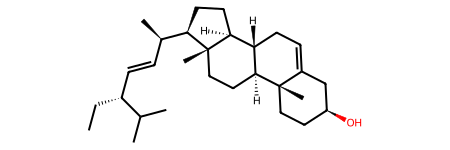

In [80]:
best_compound = [c for c in compounds_with_prediction if c[1][1] >= 0.75]
#best_compound[0][0].synonyms
best_molecule = getRdkitMoleculeFromPubChemCompound(best_compound[4][0])
best_molecule

## Model 2

In [81]:
model = load_object_from_disk("model_2.pkl")

Object has been deserialized and loaded from file.


In [82]:
X_pred = df_X    
Y_pred = model.predict_proba(X_pred)

In [83]:
Y_pred

array([[0.95138889, 0.04861111],
       [0.97916667, 0.02083333],
       [0.95833333, 0.04166667],
       [1.        , 0.        ],
       [0.77083333, 0.22916667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.9375    , 0.0625    ],
       [0.9375    , 0.0625    ],
       [0.96875   , 0.03125   ],
       [0.83333333, 0.16666667],
       [0.95833333, 0.04166667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.91666667, 0.08333333],
       [0.9375    , 0.0625    ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.97916667, 0.02083333],
       [0.85416667, 0.14583333],
       [1.        , 0.        ],
       [0.97916667, 0.02083333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.91666667, 0.08333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.97916667, 0.02083333],
       [0.

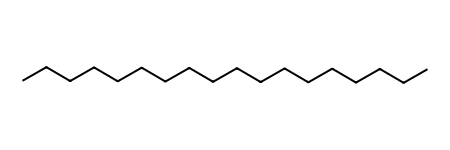

In [101]:
compounds_with_prediction = list(zip(prediction_compounds, Y_pred, prediction_features))
best_compound = [c for c in compounds_with_prediction if c[1][1] >= 0.20]
#best_compound[0][0].synonyms
best_molecule = getRdkitMoleculeFromPubChemCompound(best_compound[0][0])
best_molecule